# LendingClub数据集

Lending Club(www.lendingclub.com) 是美国的一个P2P平台。它把需要钱的人（借钱者）和 有钱的人（投资者）联系在一起。我们试图创建一个模型来预测贷款给某人的风险，给定各种与信用相关的数据。我们将使用2007-2010年的借贷数据并试图分类和预测**某位借款人是否全额偿还贷款。**

下面是该数据集中包含的所有列：

* **credit.policy**: 1 如果客户符合LendingClub.com的信用承保标准，否则 0。
* **purpose**: 借款目的（取值"credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other"）。
* **int.rate**: 借款利率。被LendingClub.com判断为更大风险的借款人将被赋以更高的利率。
* **installment**: 如果是有固定利息的长期借款，借款人每月摊付的款项。
* **log.annual.inc**: 借款人自己申报的年收入的自然对数。
* **dti**: 借款人的负债与收入比率（负债除以年收入）。
* **fico**: 对借款人的FICO信用评分。
* **days.with.cr.line**: 借款人拥有信贷额度的天数。
* **revol.bal**: 借款人的循环余额（信用卡结算周期结束时未支付的金额）。
* **revol.util**: 借款人的循环线利用率（与可用信贷总额相对应的信贷额度）。
* **inq.last.6mths**: 借款人过去6个月被债权人查询次数。
* **delinq.2yrs**:在过去2年中，借款人逾期付款30天以上的次数。
* **pub.rec**: 借款人的贬损公共记录的数量（破产申请、税务留置权或判决）。
* **not.fully.paid**: 分类值---借款人是否全额偿还了这笔钱。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('loan_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [3]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
print("Following is a breakup of credit approval status. 1 means approved credit, 0 means not approved.")
print(df['credit.policy'].value_counts())

Following is a breakup of credit approval status. 1 means approved credit, 0 means not approved.
credit.policy
1    7710
0    1868
Name: count, dtype: int64


Text(0.5, 0, 'FICO score')

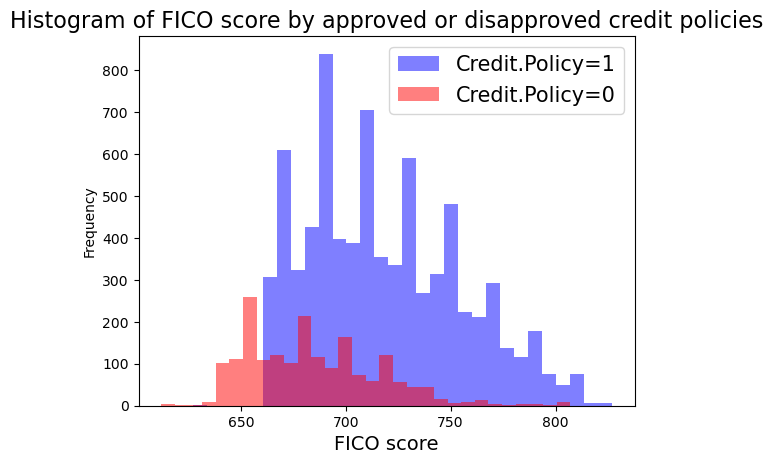

In [6]:
df[df['credit.policy']==1]['fico'].plot.hist(bins=30,alpha=0.5,color='blue', label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].plot.hist(bins=30,alpha=0.5, color='red', label='Credit.Policy=0')
plt.legend(fontsize=15)
plt.title ("Histogram of FICO score by approved or disapproved credit policies", fontsize=16)
plt.xlabel("FICO score", fontsize=14)

Text(0, 0.5, 'Interest rate')

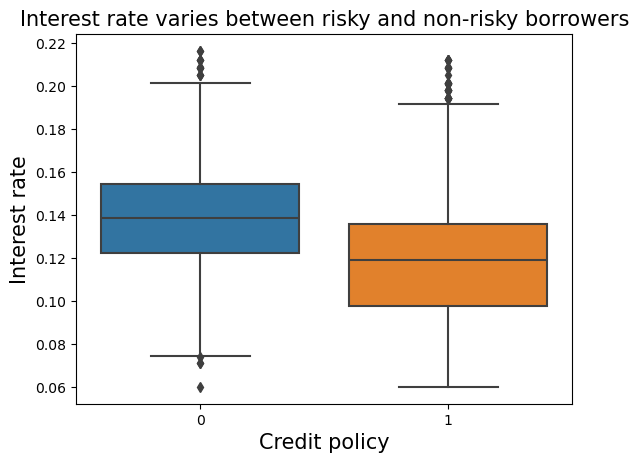

In [7]:
sns.boxplot(x=df['credit.policy'],y=df['int.rate'])
plt.title("Interest rate varies between risky and non-risky borrowers", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Interest rate",fontsize=15)

Text(0, 0.5, 'Log. annual income')

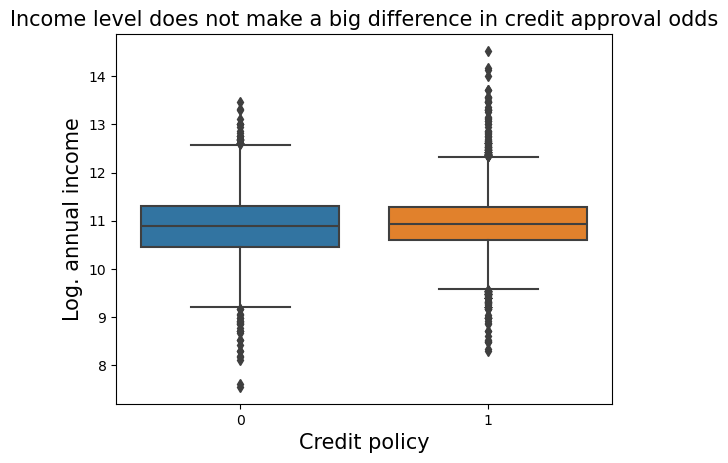

In [8]:
sns.boxplot(x=df['credit.policy'],y=df['log.annual.inc'])
plt.title("Income level does not make a big difference in credit approval odds", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Log. annual income",fontsize=15)

Text(0, 0.5, 'Days with credit line')

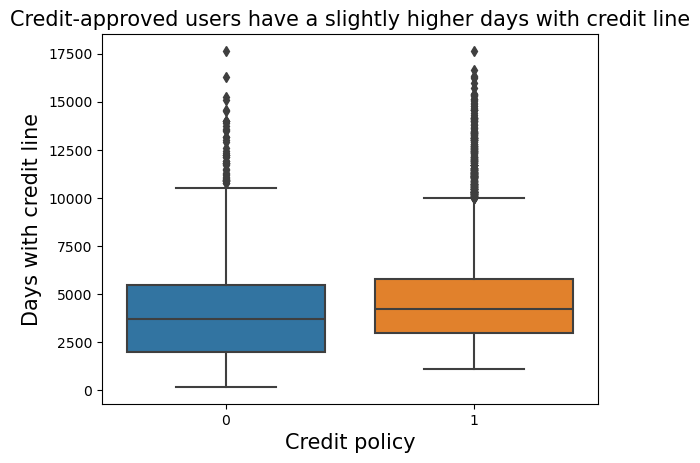

In [9]:
sns.boxplot(x=df['credit.policy'],y=df['days.with.cr.line'])
plt.title("Credit-approved users have a slightly higher days with credit line", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Days with credit line",fontsize=15)

Text(0, 0.5, 'Debt-to-income ratio')

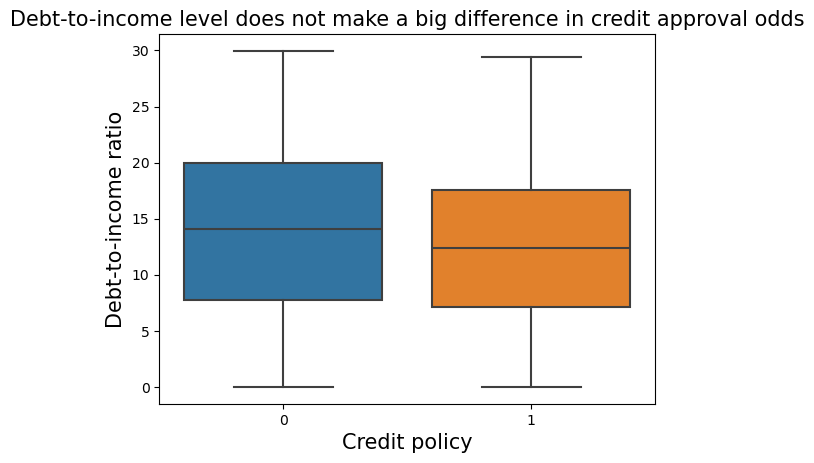

In [10]:
sns.boxplot(x=df['credit.policy'],y=df['dti'])
plt.title("Debt-to-income level does not make a big difference in credit approval odds", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Debt-to-income ratio",fontsize=15)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

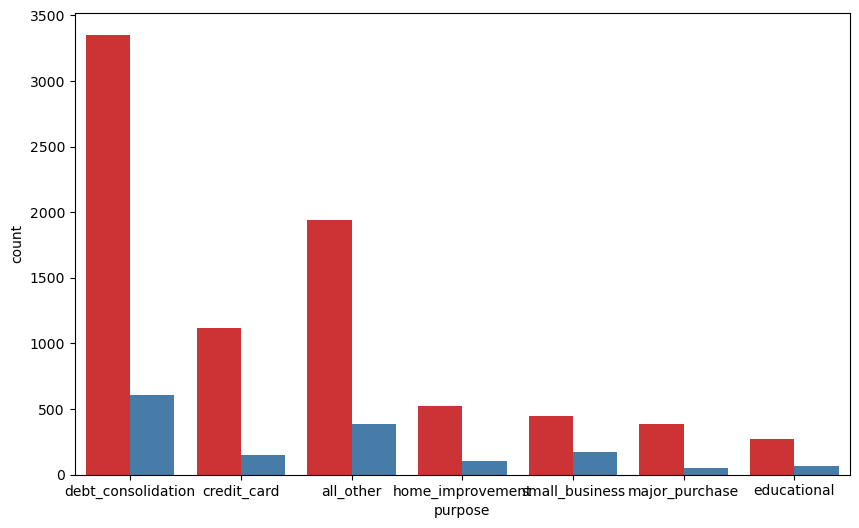

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df, palette='Set1')
plt.title("Bar chart of loan purpose colored by not fully paid status", fontsize=17)
plt.xlabel("Purpose", fontsize=15)

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


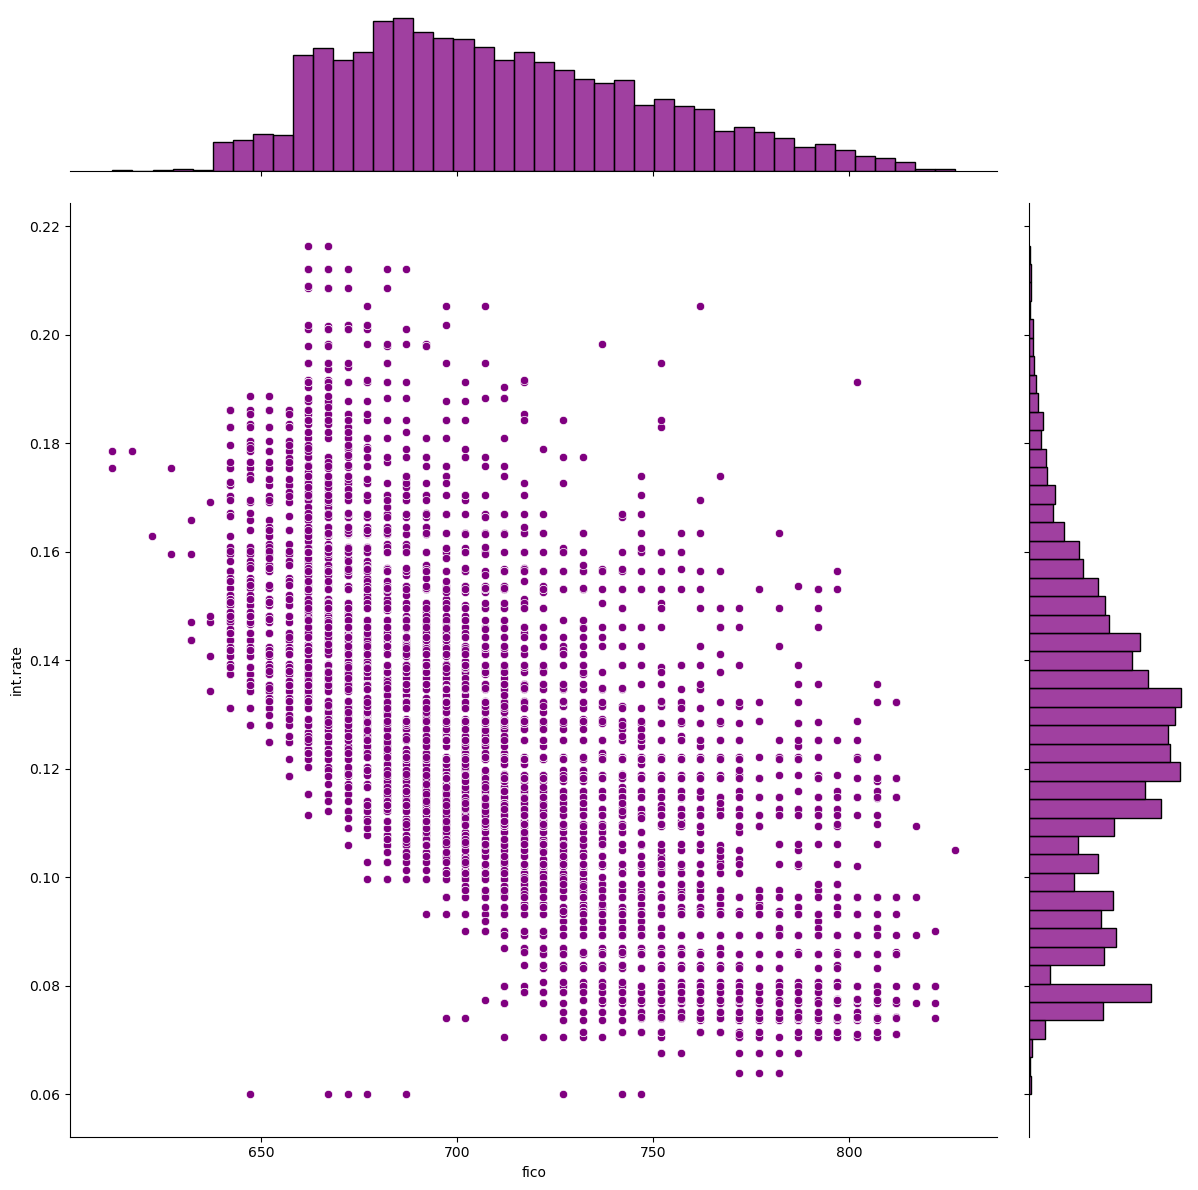

In [12]:
sns.jointplot(x='fico',y='int.rate',data=df, color='purple', height=12)

<Figure size 1400x700 with 0 Axes>

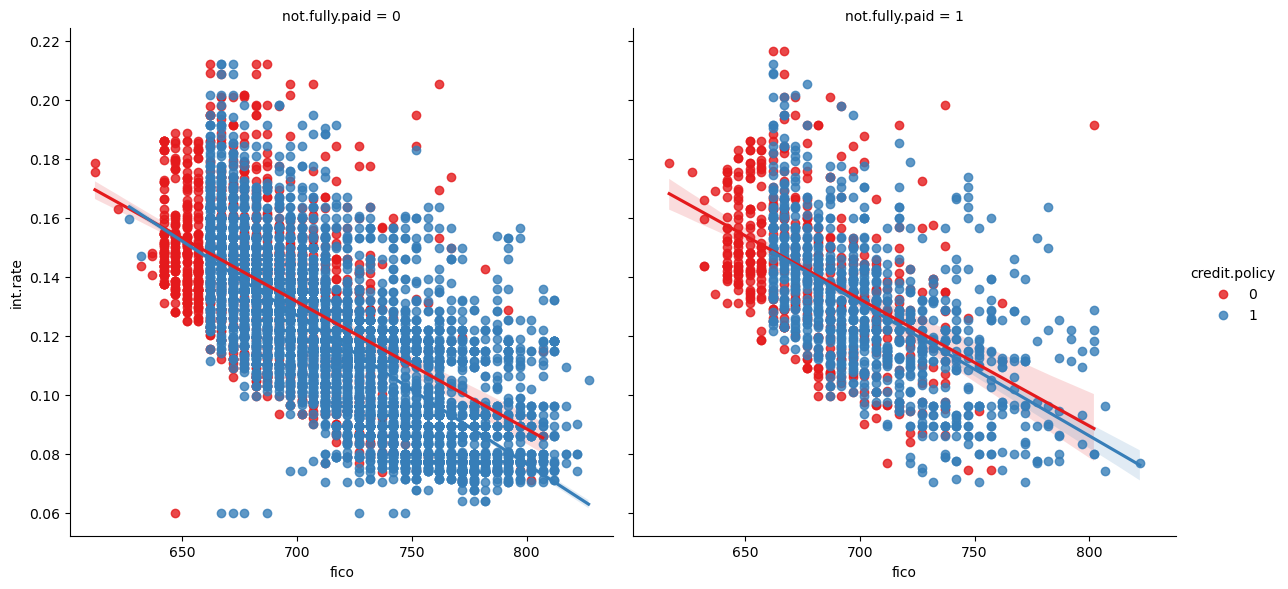

In [13]:
plt.figure(figsize=(14,7))
sns.lmplot(y='int.rate', x='fico', data=df, hue='credit.policy',
           col='not.fully.paid', palette='Set1', height=6)

# 准备数据

In [14]:
# transform "Purpose"
df_final = pd.get_dummies(df,['purpose'],drop_first=True)
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [15]:
from sklearn.model_selection import train_test_split
X = df_final.drop('not.fully.paid',axis=1)
y = df_final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [16]:
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,True,False,False,False,False,False


# 使用决策树分类

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
predictions = dtree.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2418
           1       0.20      0.23      0.22       456

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [20]:
cm=confusion_matrix(y_test, predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[1997  421]
 [ 349  107]]
Accuracy of prediction: 0.732


# 使用随机森林分类

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)

In [22]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [23]:
rfc_pred = rfc.predict(X_test)

In [24]:
cr = classification_report(y_test, rfc_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2418
           1       0.61      0.02      0.05       456

    accuracy                           0.84      2874
   macro avg       0.73      0.51      0.48      2874
weighted avg       0.81      0.84      0.78      2874



In [25]:
cm = confusion_matrix(y_test, rfc_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[2411    7]
 [ 445   11]]
Accuracy of prediction: 0.843


## 比较“基尼指数”和“熵”

In [26]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5, min_samples_split=10, max_depth=None, criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test, rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

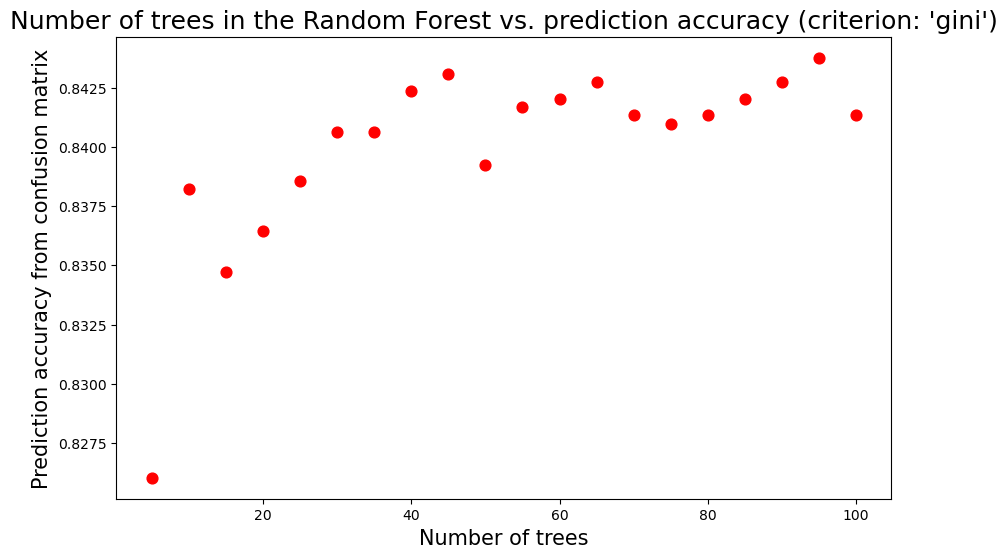

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu], y=accuracy[1:nsimu], s=60, c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [28]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5, min_samples_split=10, max_depth=None, criterion='entropy')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test, rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

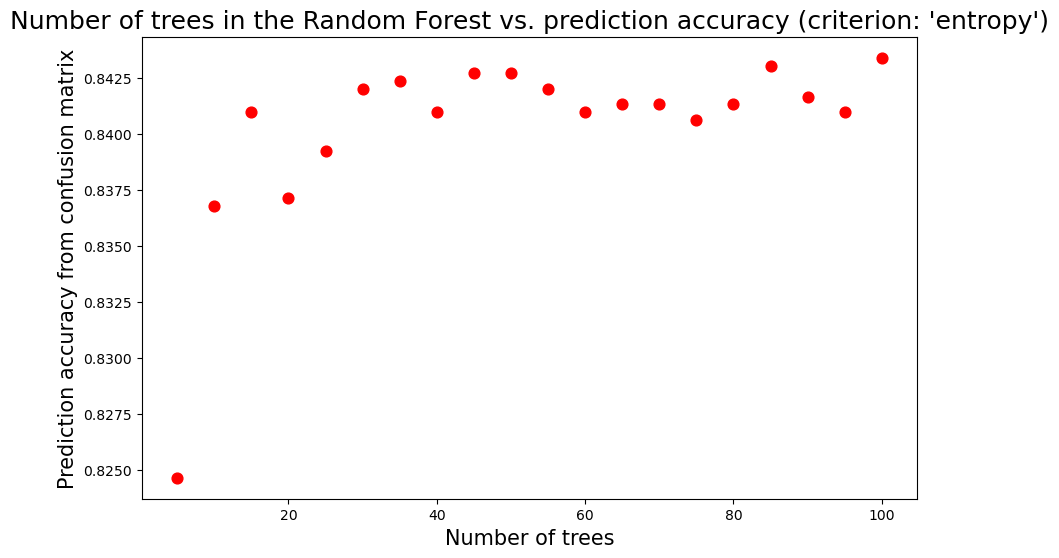

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu], y=accuracy[1:nsimu], s=60, c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'entropy')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

## 最大树深度

In [30]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5, min_samples_split=10, max_depth=None, criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test, rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

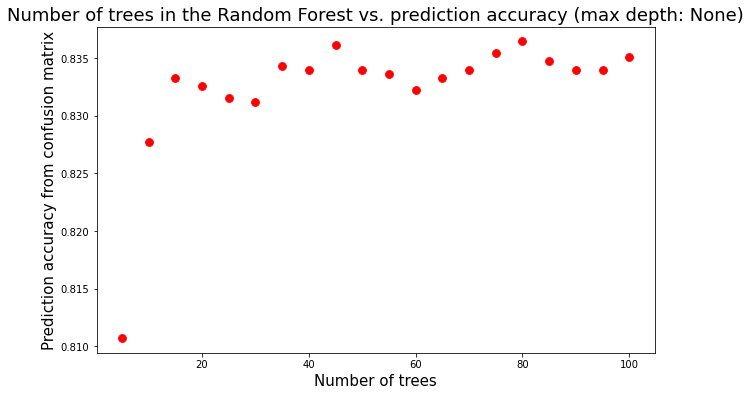

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu], y=accuracy[1:nsimu], s=60, c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: None)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [31]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5, min_samples_split=10, max_depth=5, criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test, rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

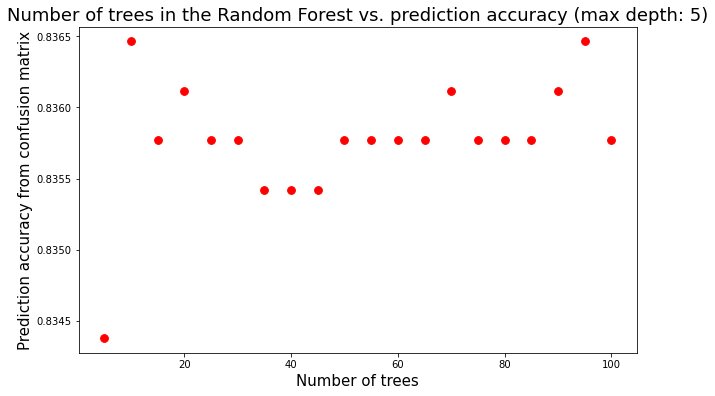

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu], y=accuracy[1:nsimu], s=60, c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: 5)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

## 可分裂的最少样本数目

In [33]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5, min_samples_split=2, max_depth=None, criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test, rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

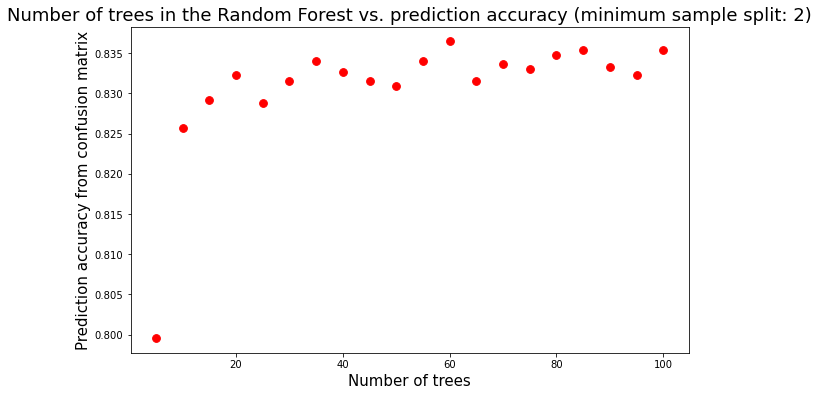

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu], y=accuracy[1:nsimu], s=60, c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 2)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [35]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5, min_samples_split=20, max_depth=None, criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test, rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

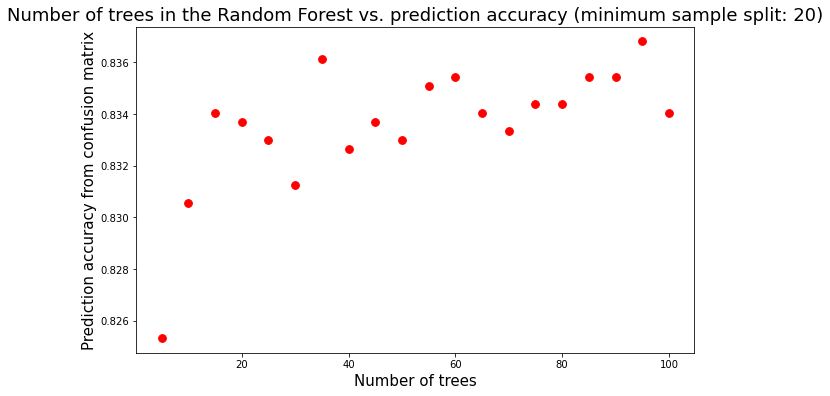

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu], y=accuracy[1:nsimu], s=60, c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 20)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

# 使用AdaBoost分类

In [31]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1,
                              random_state=1)
ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                         learning_rate=0.1,
                         random_state=1)

In [32]:
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

from sklearn.metrics import accuracy_score
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

Decision tree train/test accuracies 0.839/0.841


d:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost train/test accuracies 0.842/0.842
